In [27]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [28]:
with open("artifacts.pkl", "rb") as f:
    artifacts = pickle.load(f)

In [29]:
artifacts

{'sample_plit': {'certificate': array([0.85867927, 0.6120126 ]),
  'B': array([2, 3]),
  'delta': np.float64(0.14132072916016228)},
 'omniscient': {'certificate': array([0.85867927, 0.61867927]),
  'B': array([2, 3]),
  'delta': np.float64(0.14132072916016228)},
 'dominant': {'certificate': array([0.82691816, 0.58191816, 0.35191816]),
  'B': array([2, 3, 1]),
  'delta': np.float64(0.17308183826022852)}}

In [17]:
dataset = getattr(datasets, config.dataset)(
    num_classes=num_classes,
    num_samples=num_samples,
    rng=rng,
)

NameError: name 'datasets' is not defined

In [30]:
mu = [0.1, 0.5, 1, 0.75, 0.25]

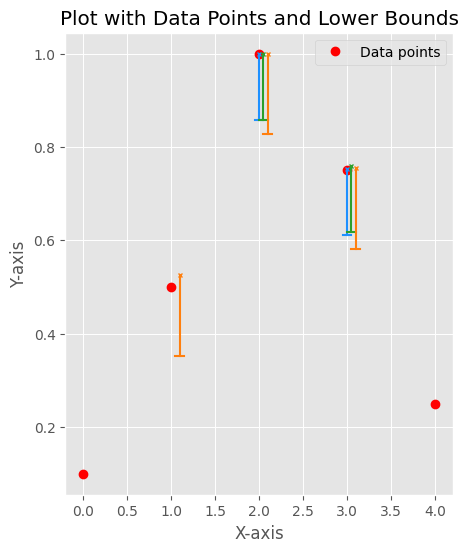

<Figure size 640x480 with 0 Axes>

In [31]:
def plot_with_bounds(mu,  experiment, line_color, index, offset):

    lower_bounds = artifacts[experiment]["certificate"]
    B = artifacts[experiment]["B"]
    delta = artifacts[experiment]["delta"]

    # Set ggplot style
    plt.style.use('ggplot')

    # Create the plot


    # Define the color for the elements

    marker_size = 3  # Adjust the size of the 'x' marks

    # Plot the main array as dots


    # Plot the lower bounds as solid lines and horizontal bars
    for i, arm in enumerate(B):
        x_offset = x[arm] + offset * index
        ax.plot([x_offset, x_offset], [lower_bounds[i], lower_bounds[i] + delta], '-', color=line_color)  # Vertical line
        ax.plot([x_offset - 0.05, x_offset + 0.05], [lower_bounds[i], lower_bounds[i]], '-', color=line_color)  # Horizontal bar
        ax.plot(x_offset, lower_bounds[i] + delta, 'x', color=line_color, markersize=marker_size)  # Upper confidence bound as 'x'


fig, ax = plt.subplots(figsize=(5, 6))
# Example data
x = np.arange(5)
y = mu  # Array to be plotted as dots
dot_color = 'red'
ax.plot(x, y, 'o', color=dot_color, label='Data points')

experiments = artifacts.keys()
colors = ['dodgerblue', '#2ca02c', '#ff7f0e']
offset = 0.05 

for index, (experiment, color) in enumerate(zip(experiments, colors)):
    plot_with_bounds(mu, experiment, color, index, offset)

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot with Data Points and Lower Bounds')
ax.legend()

# Customize the background grid lines to match ggplot
ax.grid(True, color='white', linestyle='-', linewidth=0.7)
ax.set_facecolor('#E5E5E5')  # ggplot-like grey background

# Save the plot to a file
plt.show()
plt.savefig('plot_with_bounds.png')

